# ARIMA

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [5]:
file_path = ("/content/FPT.csv" )
data = pd.read_csv(file_path, delimiter=',')

In [6]:
# Xem data
data


,Date,Price
0,12/15/2016,15077.4
1,12/16/2016,15167.5
2,12/19/2016,15383.6
3,12/20/2016,15329.6
4,12/21/2016,15311.6
...,...,...
1745,12/11/2023,95000.0
1746,12/12/2023,96800.0
1747,12/13/2023,95200.0
1748,12/14/2023,96200.0


In [7]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.4 MB/s eta 0:00:00


## **TRAIN - TEST: 8 : 2**

---



In [8]:
#1. split data into train, test sets with a ratio of 8:2
train_size = int(0.8 * len(data))
test_size =len(data) - train_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

In [9]:
# 2. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22888.656, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22891.209, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22892.407, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22892.267, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22893.734, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22887.490, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=22886.125, Time=0.28 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=22886.057, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=22885.982, Time=0.64 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=22869.336, Time=2.73 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=22867.713, Time=5.36 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=22869.073, Time=5.12 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=4.84 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=22870.034, Time=3.51 sec
 ARIMA(2,1,4)(0,0,0)[0] i

ARIMA(order=(4, 1, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [10]:
# 3. Testing proccess
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

In [11]:
# 4. The process of creating index predicts the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[83926.25591023 84213.82074457 84298.79054525 84352.9844733
 84516.69619435 84456.10843854 84349.81670154 84366.35159493
 84217.95936727 84071.47571878 84093.72564338 84010.74023023
 83952.73979737 84064.92525649 84076.93164667 84086.12293868
 84225.91747815 84244.58457828 84227.1124721  84311.84383405
 84277.5026866  84205.63779663 84239.86733339 84183.23934463
 84106.45899178 84147.07633515 84120.48291891 84079.24864185
 84149.15102266 84155.19416678]


In [12]:
# 5. Evaluate the accuracy of testing
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
test_rmse = np.sqrt(MSE(y_test, y_pred))
test_mape = MAPE(y_test, y_pred)*100
test_mae = MAE(y_test, y_pred)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 6914.880643693968
Testing MAPE: 6.778027863050079
Testing MAE: 5595.616683579648


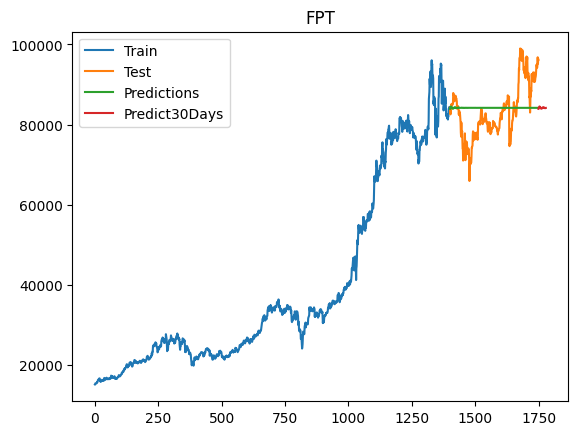

In [13]:
# 6. Draw
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Predict30Days'])
plt.title('FPT', fontweight='bold', fontsize=16, pad=20)
plt.title('FPT')
plt.show()


## **TRAIN - TEST: 7 : 3**

---



In [14]:
#1. split data into train, test sets with a ratio of 7:3
train_size = int(0.7 * len(data))
test_size =len(data) - train_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

In [15]:
# 2. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=1.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=20081.473, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=19752.260, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=19612.767, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=19522.635, Time=0.11 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=19505.247, Time=0.12 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=19459.789, Time=0.16 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=1.24 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.85 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=19461.793, Time=0.30 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 4.324 seconds


ARIMA(order=(5, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [16]:
# 3. Testing proccess
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

In [17]:
# 4. The process of creating index predicts the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[80105.8765938  80150.5951424  80350.264472   80426.39506347
 80404.25728936 80565.18302438 80689.71729142 80776.96286686
 80881.36070965 80981.23625223 81066.41656507 81175.32077631
 81279.3833196  81377.0096216  81476.55358177 81577.21395712
 81675.61234047 81776.89184386 81877.51234641 81977.202126
 82077.10198527 82177.37581224 82277.29125273 82377.53592782
 82477.69261962 82577.73352018 82677.79460061 82777.93259123
 82878.01303615 82978.12920072]


In [18]:
# 5. Evaluate the accuracy of testing
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
test_rmse = np.sqrt(MSE(y_test, y_pred))
test_mape = MAPE(y_test, y_pred)*100
test_mae = MAE(y_test, y_pred)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 27215.81318667968
Testing MAPE: 28.824240712761846
Testing MAE: 23706.788061116345


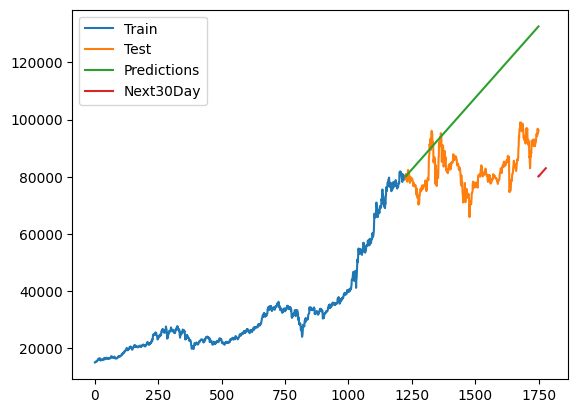

In [19]:
# 6. Draw
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

## **TRAIN - TEST: 9 : 1**

---



In [20]:
#1. split data into train, test sets with a ratio of 9:1
train_size = int(0.9 * len(data))
test_size =len(data) - train_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

In [21]:
# 2. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=25897.412, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25902.332, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25904.149, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25904.117, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25903.648, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=25896.124, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=25894.928, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=25894.829, Time=0.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=25894.901, Time=1.45 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=25895.533, Time=0.44 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=25896.493, Time=0.99 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=25897.021, Time=0.10 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0] intercept
Total fit time: 4.500 seconds


ARIMA(order=(0, 1, 3), scoring_args={}, suppress_warnings=True)

In [22]:
# 3. Testing proccess
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

In [23]:
# 4. The process of creating index predicts the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[80568.41637705 80613.41384277 80654.63019699 80701.32361013
 80748.01702327 80794.71043641 80841.40384955 80888.09726269
 80934.79067583 80981.48408897 81028.17750211 81074.87091525
 81121.56432839 81168.25774153 81214.95115467 81261.64456781
 81308.33798095 81355.03139409 81401.72480724 81448.41822038
 81495.11163352 81541.80504666 81588.4984598  81635.19187294
 81681.88528608 81728.57869922 81775.27211236 81821.9655255
 81868.65893864 81915.35235178]


In [24]:
# 5. Evaluate the accuracy of testing
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
test_rmse = np.sqrt(MSE(y_test, y_pred))
test_mape = MAPE(y_test, y_pred)*100
test_mae = MAE(y_test, y_pred)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 5604.604733487625
Testing MAPE: 4.83313781428376
Testing MAE: 4349.272563902088


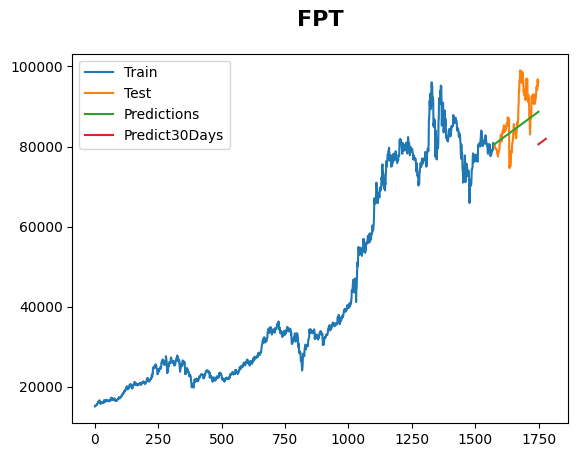

In [25]:
# 6. Draw
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Predict30Days'])
plt.title('FPT', fontweight='bold', fontsize=16, pad=20)
plt.show()
